In [1]:
import os
import tools
import numpy as np
import pandas as pd
import scanpy as sc

sc.logging.print_header()

scanpy==1.9.1 anndata==0.7.6 umap==0.5.1 numpy==1.22.4 scipy==1.6.2 pandas==1.4.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.11 pynndescent==0.5.2


In [2]:
os.chdir('/lustre/scratch117/cellgen/team297/kt16/COVID_imperial_renal')

In [3]:
bdata = sc.read_h5ad('h5ad/df.fil3_gex_bcells_no_CLL_vdj_230622.h5ad')
bdata

AnnData object with n_obs × n_vars = 68683 × 330
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartment

In [4]:
list(set(bdata.obs['celltype_B_corrected'].unique()))

['B_switched_mem',
 'B_ASC_dividing',
 'B_ASC_IgG',
 'B_CD11c',
 'B_naive',
 'doublet',
 'B_non-switched_mem',
 'B_ASC_other',
 'B_ASC_IgM',
 'B_ASC_IgA']

In [5]:
bdata = bdata[bdata.obs['celltype_B_corrected'] != 'doublet'].copy()

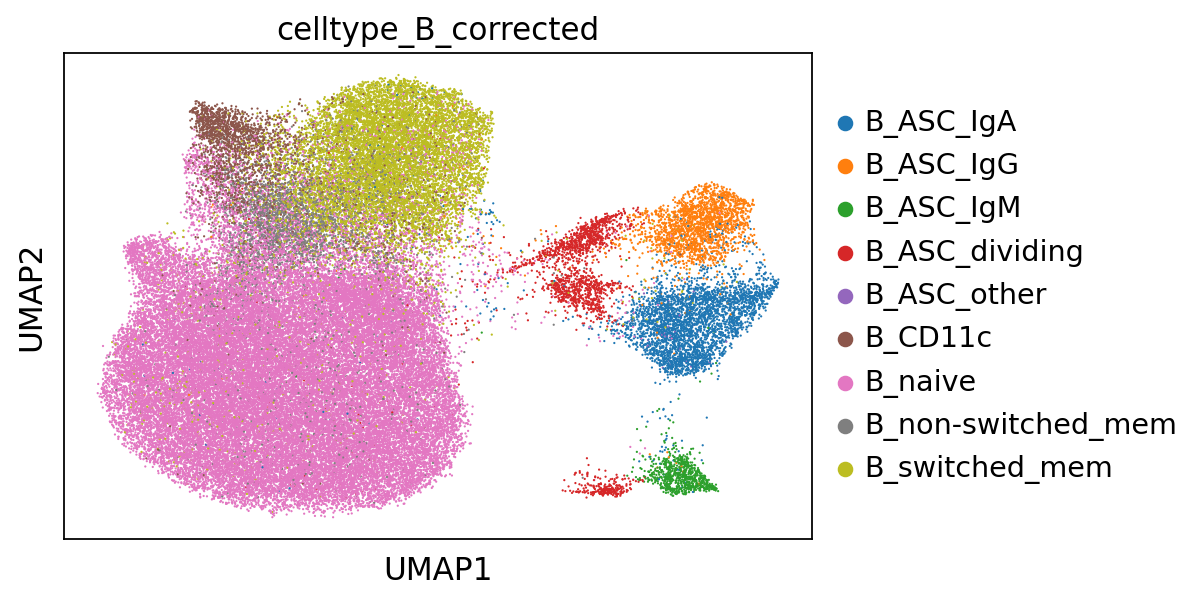

In [12]:
sc.set_figure_params(figsize = (6,4), dpi_save = 900, vector_friendly = True)
sc.pl.umap(bdata, color = 'celltype_B_corrected', size = 4, save = '/B_cell_umap.pdf')

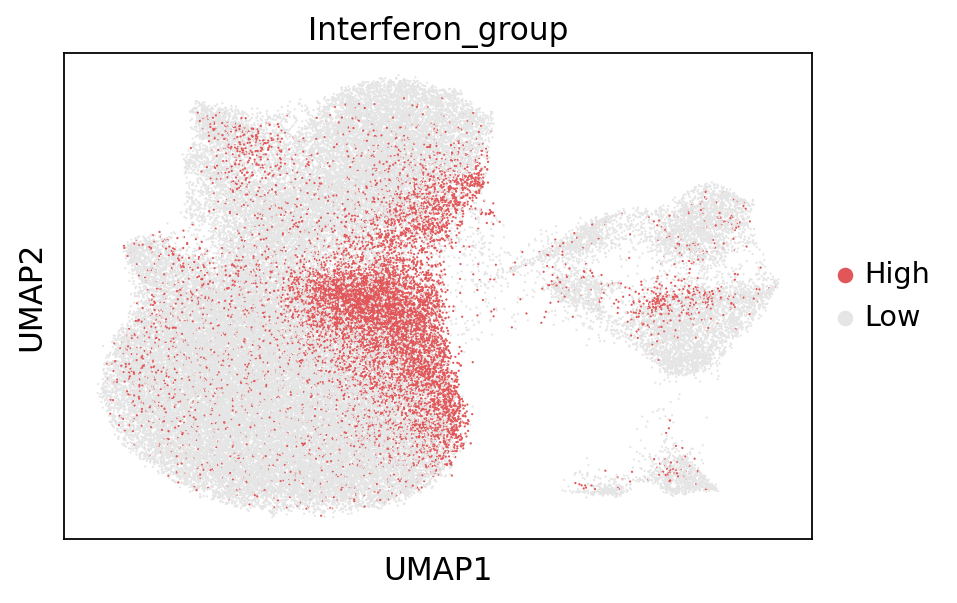

In [15]:
sc.pl.umap(bdata, color = 'Interferon_group', palette = {'Low':'#e5e5e5', 'High':'#e15759'}, size = 4, save = '/B_cell_umap_interferon_high_low.pdf')

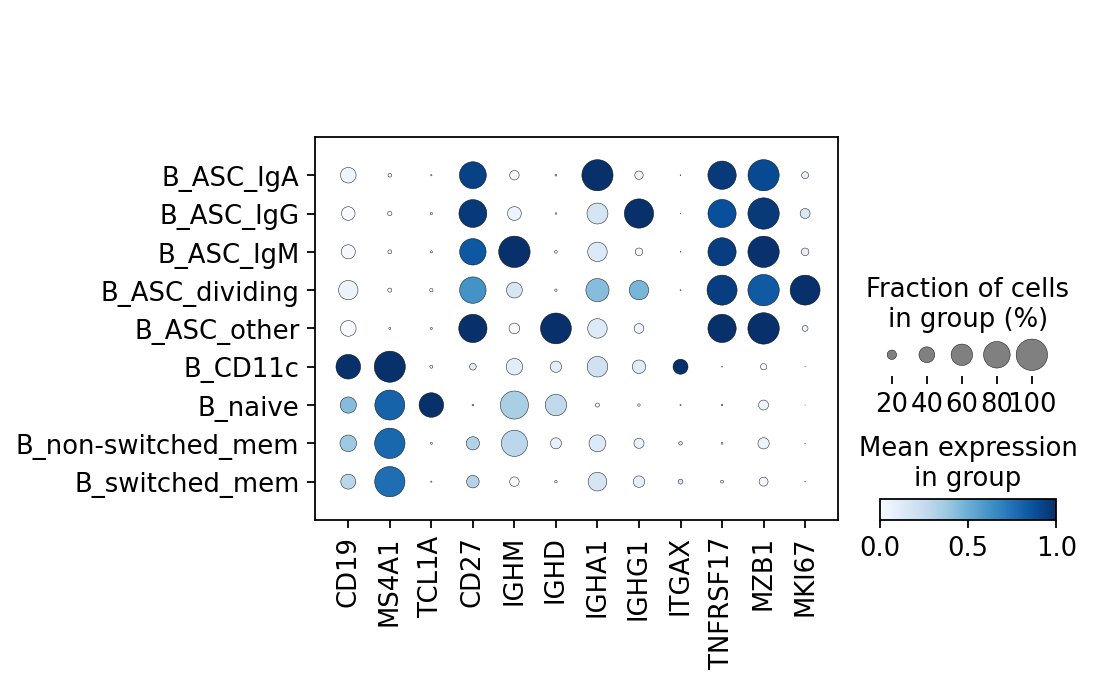

In [26]:
## markers
sc.pl.dotplot(bdata, ['CD19', 'MS4A1', 'TCL1A', 'CD27', 'IGHM', 'IGHD', 'IGHA1', 'IGHG1', 'ITGAX', 'TNFRSF17', 'MZB1', 'MKI67'], 
              groupby = 'celltype_B_corrected', 
              color_map = 'Blues', 
              standard_scale = 'var',
              save = '/B_cell_markers.pdf'
             )